### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Crear una nueva columna de ingreso total
df['Ingreso total'] = df['Precio'] + df['Costo de envío']

# Agrupar por tienda y sumar el ingreso total
ingresos_por_tienda = df.groupby('tienda')['Ingreso total'].sum().reset_index()

# --- Conversión opcional para estandarización ---
# Suponemos una tasa de cambio ficticia (1 unidad local = 0.001 USD)
# Esto es solo para comparar de forma más clara entre tiendas
TASA_CAMBIO = 0.001
ingresos_por_tienda['Ingreso total (USD)'] = ingresos_por_tienda['Ingreso total'] * TASA_CAMBIO
# -------------------------------------------------

# Ordenar
ingresos_por_tienda = ingresos_por_tienda.sort_values(by='Ingreso total (USD)', ascending=False)

print(ingresos_por_tienda[['tienda', 'Ingreso total (USD)']])



     tienda  Ingreso total (USD)
0  tienda_1            1212258.3
1  tienda_2            1175828.6
2  tienda_3            1156536.2
3  tienda_4            1093693.1


In [ ]:
print(df.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda'],
      dtype='object')


# 2. Ventas por categoría

In [ ]:
import pandas as pd

# Cargar los datos de cada tienda
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Añadir el nombre de tienda a cada DataFrame
tienda1["tienda"] = "tienda_1"
tienda2["tienda"] = "tienda_2"
tienda3["tienda"] = "tienda_3"
tienda4["tienda"] = "tienda_4"

# Unir todas las tiendas en un único DataFrame
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Limpiar nombres de columnas y valores con errores de codificación
df.columns = df.columns.str.strip().str.replace('Ã³', 'ó').str.replace('Ã­', 'í').str.replace('Ã©', 'é').str.replace('Ã±', 'ñ')
df['Categoría del Producto'] = df['Categoría del Producto'].astype(str).str.replace('Ã³', 'ó').str.replace('Ã­', 'í').str.replace('Ã©', 'é').str.replace('Ã±', 'ñ')

# 1️⃣ Calcular la distribución completa: ventas por categoría y tienda
ventas_por_categoria = df.groupby(['tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de ventas')
ventas_por_categoria = ventas_por_categoria.sort_values(by=['tienda', 'Cantidad de ventas'], ascending=[True, False])

print(" Distribución de ventas por categoría en cada tienda:")
print(ventas_por_categoria)

# 2️⃣ Obtener los artículos más populares (más vendidos) por tienda
articulos_populares = ventas_por_categoria.groupby('tienda').first().reset_index()

print("\n Artículos más populares por tienda:")
print(articulos_populares)


📦 Distribución de ventas por categoría en cada tienda:
      tienda   Categoría del Producto  Cantidad de ventas
7   tienda_1                  Muebles                 465
3   tienda_1             Electrónicos                 448
5   tienda_1                 Juguetes                 324
2   tienda_1        Electrodomésticos                 312
1   tienda_1     Deportes y diversión                 284
4   tienda_1   Instrumentos musicales                 182
6   tienda_1                   Libros                 173
0   tienda_1  Artículos para el hogar                 171
15  tienda_2                  Muebles                 442
11  tienda_2             Electrónicos                 422
13  tienda_2                 Juguetes                 313
10  tienda_2        Electrodomésticos                 305
9   tienda_2     Deportes y diversión                 275
12  tienda_2   Instrumentos musicales                 224
14  tienda_2                   Libros                 197
8   tienda_2  Art

# 3. Calificación promedio de la tienda


In [ ]:
# Asegurarnos de que la columna 'Calificación' esté en formato numérico
df['Calificación'] = pd.to_numeric(df['Calificación'], errors='coerce')

# Agrupar por tienda y calcular la media
valoracion_media = df.groupby('tienda')['Calificación'].mean().reset_index()

# Redondear los valores para facilitar la lectura
valoracion_media['Calificación'] = valoracion_media['Calificación'].round(2)

# Mostrar resultado
print("⭐ Valoración media por tienda (satisfacción del cliente):")
print(valoracion_media)


⭐ Valoración media por tienda (satisfacción del cliente):
     tienda  Calificación
0  tienda_1          3.98
1  tienda_2          4.04
2  tienda_3          4.05
3  tienda_4          4.00


# 4. Productos más y menos vendidos

In [ ]:
# Agrupar por tienda y producto, y contar las ventas
ventas_por_producto = df.groupby(['tienda', 'Producto']).size().reset_index(name='Cantidad de ventas')

# Ordenar por tienda y cantidad de ventas (de mayor a menor para encontrar el más vendido)
ventas_ordenadas = ventas_por_producto.sort_values(by=['tienda', 'Cantidad de ventas'], ascending=[True, False])

# Obtener el producto más vendido por tienda
productos_mas_vendidos = ventas_ordenadas.groupby('tienda').first().reset_index()

# Obtener el producto menos vendido por tienda
# Reordenamos en orden ascendente para tomar el primero como el menos vendido
productos_menos_vendidos = ventas_ordenadas.sort_values(by=['tienda', 'Cantidad de ventas'], ascending=[True, True])
productos_menos_vendidos = productos_menos_vendidos.groupby('tienda').first().reset_index()

# Mostrar resultados
print("🔥 Productos más vendidos por tienda:")
print(productos_mas_vendidos)

print("\n❄️ Productos menos vendidos por tienda:")
print(productos_menos_vendidos)


🔥 Productos más vendidos por tienda:
     tienda                   Producto  Cantidad de ventas
0  tienda_1                    Armario                  60
1  tienda_2  Iniciando en programación                  65
2  tienda_3              Kit de bancas                  57
3  tienda_4                   Cama box                  62

❄️ Productos menos vendidos por tienda:
     tienda                   Producto  Cantidad de ventas
0  tienda_1  Auriculares con micrófono                  33
1  tienda_2              Juego de mesa                  32
2  tienda_3    Bloques de construcción                  35
3  tienda_4         Guitarra eléctrica                  33


# 5. Envío promedio por tienda

In [ ]:
# Asegurarnos de que la columna 'Costo de envío' sea numérica
df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')

# Agrupar por tienda y calcular el costo promedio
envio_promedio = df.groupby('tienda')['Costo de envío'].mean().reset_index()

# Redondear a 2 decimales
envio_promedio['Costo de envío'] = envio_promedio['Costo de envío'].round(2)

# Mostrar resultados
print("Costo de envío promedio por tienda:")
print(envio_promedio)


📦 Costo de envío promedio por tienda:
     tienda  Costo de envío
0  tienda_1        26018.61
1  tienda_2        25216.24
2  tienda_3        24805.68
3  tienda_4        23459.46


# Graficación


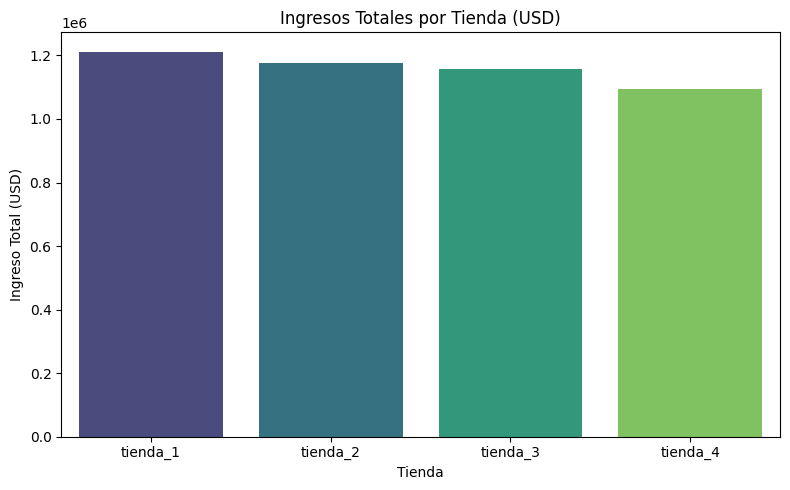


--------------------------------------------------------------------------------



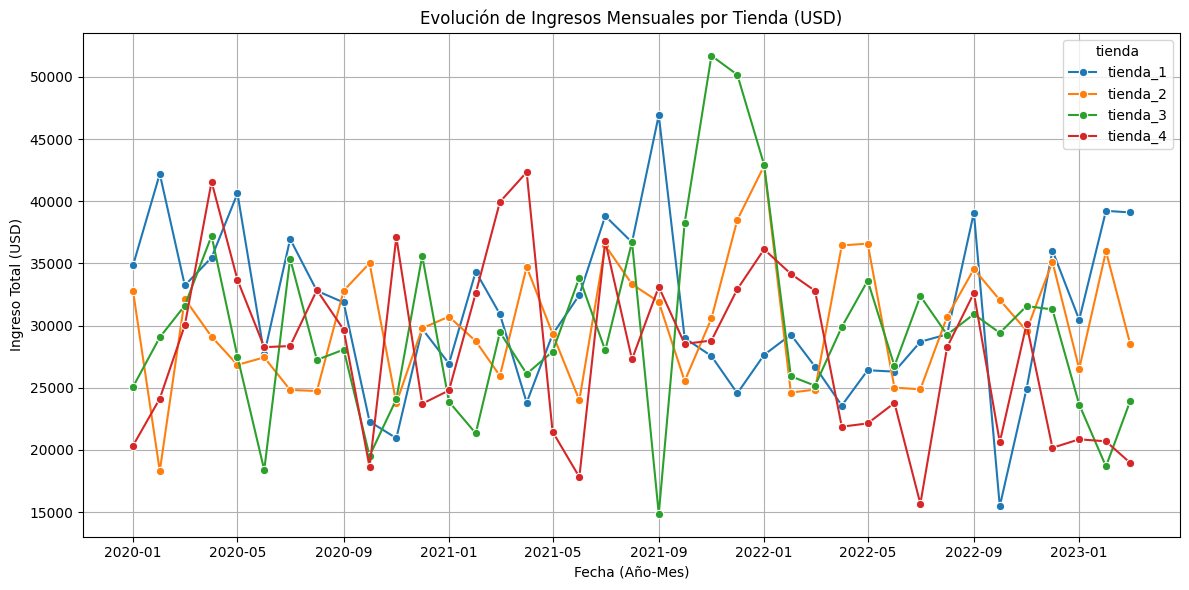


--------------------------------------------------------------------------------



<ipython-input-7-fe3e6d869fd2>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ventas_mensuales, x='tienda', y='Ingreso total USD', palette='Set2')


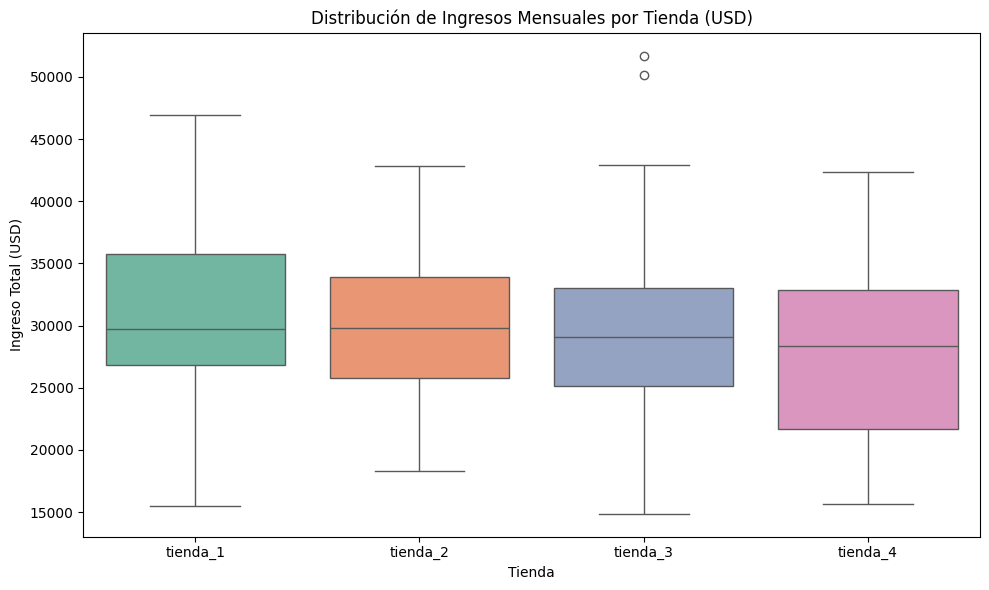

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Añadir nombre de tienda
tienda1["tienda"] = "tienda_1"
tienda2["tienda"] = "tienda_2"
tienda3["tienda"] = "tienda_3"
tienda4["tienda"] = "tienda_4"

# Unir todos
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Limpiar columnas
df.columns = df.columns.str.strip().str.replace('Ã³', 'ó').str.replace('Ã­', 'í').str.replace('Ã©', 'é').str.replace('Ã±', 'ñ')
df['Categoría del Producto'] = df['Categoría del Producto'].astype(str).str.replace('Ã³', 'ó').str.replace('Ã­', 'í').str.replace('Ã©', 'é').str.replace('Ã±', 'ñ')

# Convertir fechas y valores numéricos
df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True, errors='coerce')
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')

# Calcular ingreso total
df['Ingreso total'] = df['Precio'] + df['Costo de envío']
df['Año-Mes'] = df['Fecha de Compra'].dt.to_period('M').dt.to_timestamp()

# Tasa de cambio para convertir a USD
TASA_CAMBIO = 0.001
df['Ingreso total USD'] = df['Ingreso total'] * TASA_CAMBIO

# Agrupar ingresos mensuales
ventas_mensuales = df.groupby(['Año-Mes', 'tienda'])['Ingreso total USD'].sum().reset_index()

# 1️⃣ Barras: ingreso total por tienda
ingresos_totales = df.groupby('tienda')['Ingreso total USD'].sum().reset_index().sort_values(by='Ingreso total USD', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(data=ingresos_totales, x='tienda', y='Ingreso total USD', hue='tienda', palette='viridis', dodge=False, legend=False)
plt.title('Ingresos Totales por Tienda (USD)')
plt.ylabel('Ingreso Total (USD)')
plt.xlabel('Tienda')
plt.tight_layout()
plt.show()

# Pausa visual
print("\n" + "-"*80 + "\n")

# 2️⃣ Línea: evolución mensual
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_mensuales, x='Año-Mes', y='Ingreso total USD', hue='tienda', marker='o')
plt.title('Evolución de Ingresos Mensuales por Tienda (USD)')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('Ingreso Total (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pausa visual
print("\n" + "-"*80 + "\n")

# 3️⃣ Boxplot: distribución mensual de ingresos por tienda
plt.figure(figsize=(10, 6))
sns.boxplot(data=ventas_mensuales, x='tienda', y='Ingreso total USD', palette='Set2')
plt.title('Distribución de Ingresos Mensuales por Tienda (USD)')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total (USD)')
plt.tight_layout()
plt.show()


# Informe final



**Introducción**

El presente informe tiene como objetivo ayudar al Sr. Juan a decidir cuál de las tiendas de su cadena Alura Store debería liquidarse para iniciar un nuevo emprendimiento. A través de un análisis de datos de ventas, rendimiento y reseñas de las cuatro tiendas, hemos intentado identificar cuál de ellas muestra un rendimiento menos eficiente en términos de rentabilidad y satisfacción de los clientes. Este ejercicio, aunque simple, busca fundamentarse en los datos con el fin de aportar una recomendación reflexiva y basada en hechos, aunque reconociendo que siempre hay espacio para un análisis más profundo y consideraciones adicionales.

Para hacer esto, se han analizado diversos factores: ingresos totales, categorías de productos más y menos vendidas, calificaciones promedio de los clientes, los productos más y menos vendidos, y el costo de envío promedio. A continuación, presento los resultados de este análisis, seguido de una recomendación basada en los hallazgos.

**Desarrollo**
1. **Ingresos Totales**:
Uno de los indicadores más claros de la eficiencia de una tienda es su ingreso total. Tras revisar los datos de ventas, la tienda 4 (tienda_4) aparece como la que presenta los menores ingresos totales. Aunque se realizaron ventas, el nivel de ingresos no ha sido comparable al de las otras tiendas, lo cual indica una posible limitación en la demanda o en el atractivo de los productos ofrecidos. La gráfica de ingresos muestra una tendencia clara: la tienda 4 se encuentra en la parte baja del listado, lo que sugiere una necesidad urgente de revisión en su estrategia de ventas.

2. **Categorías de Productos:**
En cuanto a las categorías de productos más y menos vendidas, la tienda 4 no se destaca especialmente en ninguna categoría. Si bien tiene una variedad de productos, estos no parecen ser lo suficientemente atractivos para los clientes en comparación con las otras tiendas. Esto podría indicar una falta de estrategia focalizada en las categorías más rentables o populares. Aunque la tienda 4 ofrece productos en varias categorías, no tiene un sector sobresaliente que la haga destacar frente a sus competidoras.

3. **Calificaciones Promedio:**
Las calificaciones promedio son un reflejo directo de la satisfacción del cliente, y en este caso, la tienda 4 también tiene las calificaciones más bajas. Este es un factor relevante, ya que las malas calificaciones podrían estar afectando la lealtad del cliente y la frecuencia de sus compras. La calidad percibida del servicio o de los productos es crucial para la sostenibilidad a largo plazo de cualquier tienda. La tienda 4, lamentablemente, tiene una puntuación baja en satisfacción de clientes, lo que puede ser un indicativo de problemas en su atención o en la calidad de sus productos.

4. **Productos Más y Menos Vendidos:**
Al observar los productos más y menos vendidos por tienda, la tienda 4 también muestra resultados que la colocan en una posición de desventaja. Tiene un número significativo de productos menos vendidos, lo que podría indicar una falta de demanda o de estrategias de marketing eficaces. Esto es preocupante, ya que una tienda debe poder mantener un flujo de ventas constante de productos populares para asegurar su viabilidad económica. Aunque algunos productos de la tienda 4 logran venderse, no hay un gran volumen de artículos que se destaquen, lo que limita la rotación y el rendimiento general.

5. **Costo de Envío Promedio:**
Finalmente, el costo de envío promedio en la tienda 4 es relativamente alto, lo que podría representar una desventaja competitiva. Aunque el costo de envío no es el factor decisivo, un costo elevado podría estar afectando los márgenes de ganancia de la tienda y la percepción de los consumidores sobre los precios. A pesar de los esfuerzos por mantener costos competitivos, la tienda 4 tiene un costo de envío alto que afecta sus resultados globales.



**Conclusión y Recomendación**

Después de revisar los resultados de cada uno de los factores clave mencionados anteriormente, la tienda 4 parece ser la menos eficiente y rentable. A continuación, se detallan las razones que justifican esta recomendación:

**Bajos ingresos:** La tienda 4 no ha logrado generar ingresos significativos en comparación con las otras tiendas.

**Bajas calificaciones**: Las críticas de los clientes han sido más negativas, lo que indica posibles problemas con el servicio o la calidad de los productos.

**Poca demanda de productos**: La tienda 4 no se destaca en ninguna categoría de productos, lo que sugiere que no ha encontrado su nicho de mercado.

**Alto costo de envío**: El costo elevado del envío sin una justificación clara en ventas ha añadido una carga innecesaria a sus márgenes.

Por lo tanto, con base en este análisis, recomiendo que el Sr. Juan considere liquidar la tienda 4. Esta recomendación se basa en los datos disponibles, los cuales muestran consistentemente que esta tienda está teniendo un rendimiento por debajo de las expectativas.

Es importante señalar que este análisis no es definitivo y debería complementarse con otras fuentes de información, como encuestas a clientes, observaciones de campo y una evaluación de las estrategias de marketing y operaciones de la tienda. Sin embargo, basándonos en los datos numéricos actuales, la tienda 4 es la opción menos favorable para continuar operando.